In [ ]:
''' Install Spotipy package '''

!pip install spotipy
!pip install -U kaleido

In [ ]:
''' Mount Google Drive '''

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
''' IMPORTS '''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

from sklearn.manifold import TSNE
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.offline import plot
from plotly.subplots import make_subplots
import plotly

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
''' READ DATA '''

data = pd.read_csv('drive/MyDrive/USML/v2/data.csv')
genre_data = pd.read_csv('drive/MyDrive/USML/v2/data_by_genres.csv')
year_data = pd.read_csv('drive/MyDrive/USML/v2/data_by_year.csv')
artist_data = pd.read_csv('drive/MyDrive/USML/v2/data_by_artist.csv')

In [ ]:
''' PRINT DATA '''

data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
''' PRINT GENRE DATA '''

genre_data.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [ ]:
''' PRINT YEAR DATA '''

year_data.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [ ]:
''' PRINT ARTIST DATA '''

artist_data.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


<h2>EXPLORATORY DATA ANALYSIS</h2>

In [ ]:
total_songs = len(pd.unique(data['id']))
print('Total number of songs in the dataset: ', total_songs)

total_genres = len(pd.unique(genre_data['genres']))
print('Total number of genres of songs in the dataset: ', total_genres)

total_artists = len(pd.unique(artist_data['artists']))
print('Total number of artists in the dataset: ', total_artists)

Total number of songs in the dataset:  170653
Total number of genres of songs in the dataset:  2973
Total number of artists in the dataset:  28680


{'0 to 2': 10861, '2 to 4': 102298, '4 to 6': 44016, '6 to 8': 8445, '8 to 10': 2766, '10 to 12': 985, '12 to 14': 485, '14 and more': 797}


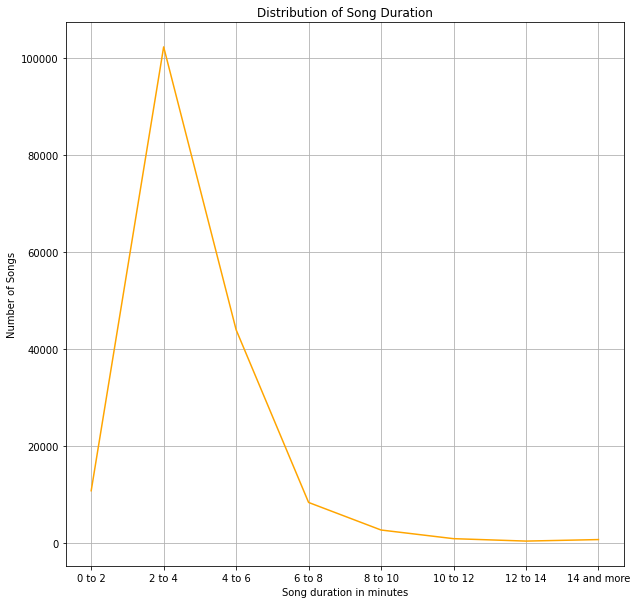

In [ ]:
''' SONG DURATION '''

''' Song duration '''

song_durations = data['duration_ms'].tolist()
song_ids = data['id'].tolist()

song_duration_dict = {
    '0 to 2': 0,
    '2 to 4': 0,
    '4 to 6': 0,
    '6 to 8': 0,
    '8 to 10': 0,
    '10 to 12': 0,
    '12 to 14': 0,
    '14 and more': 0
}

for song_duration in song_durations:
  if(song_duration/60000 < 2):
    song_duration_dict['0 to 2'] += 1
  elif(song_duration/60000 < 4):
    song_duration_dict['2 to 4'] += 1
  elif(song_duration/60000 < 6):
    song_duration_dict['4 to 6'] += 1
  elif(song_duration/60000 < 8):
    song_duration_dict['6 to 8'] += 1
  elif(song_duration/60000 < 10):
    song_duration_dict['8 to 10'] += 1
  elif(song_duration/60000 < 12):
    song_duration_dict['10 to 12'] += 1
  elif(song_duration/60000 < 14):
    song_duration_dict['12 to 14'] += 1
  else:
    song_duration_dict['14 and more'] += 1

fig = plt.figure(figsize = (10, 10))
print(song_duration_dict)
plt.plot(list(song_duration_dict.keys()), list(song_duration_dict.values()), color = 'orange')
plt.title('Distribution of Song Duration')
plt.xlabel('Song duration in minutes')
plt.ylabel('Number of Songs')
plt.grid(True)
#plt.show()

plt.savefig('drive/MyDrive/USML/v2/plots/EDA/song_duration.png')

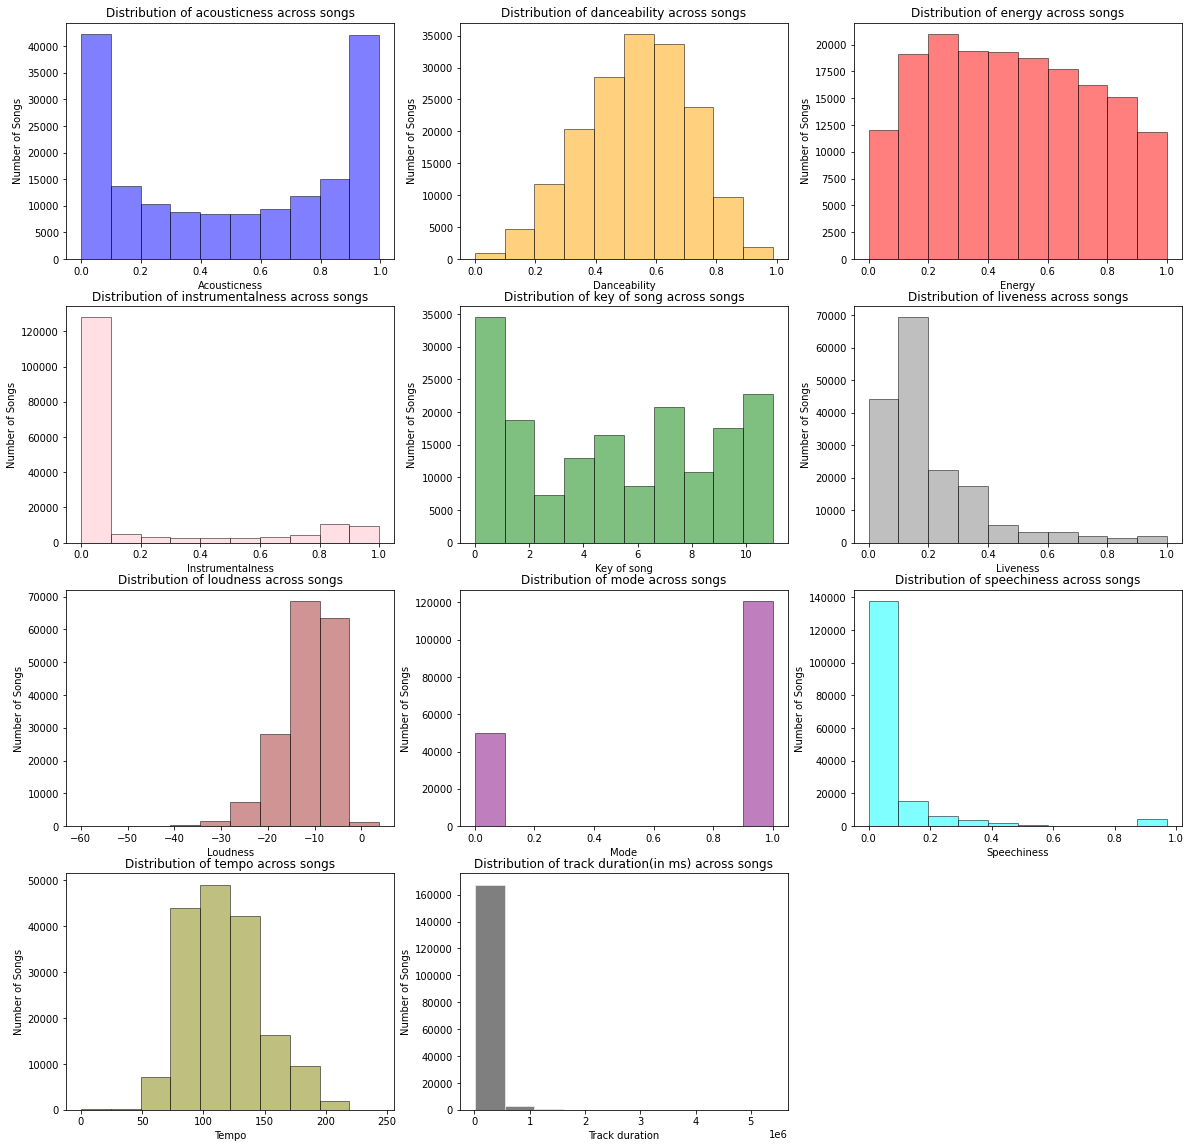

In [ ]:
''' Charecteristics of songs '''

acousticness = data.groupby('id', as_index=False)['acousticness'].mean()
danceability = data.groupby('id', as_index=False)['danceability'].mean()
energy = data.groupby('id', as_index=False)['energy'].mean()
instrumentalness = data.groupby('id', as_index=False)['instrumentalness'].mean()
key = data.groupby('id', as_index=False)['key'].mean()
liveness = data.groupby('id', as_index=False)['liveness'].mean()
loudness = data.groupby('id', as_index=False)['loudness'].mean()
mode = data.groupby('id', as_index=False)['mode'].mean()
speechiness = data.groupby('id', as_index=False)['speechiness'].mean()
tempo = data.groupby('id', as_index=False)['tempo'].mean()
duration_ms =data.groupby('id', as_index=False)['duration_ms'].mean()

fig = plt.figure(figsize = (20, 20))

plt.subplot(4, 3, 1)
plt.title('Distribution of acousticness across songs')
plt.xlabel('Acousticness')
plt.ylabel('Number of Songs')
plt.hist(acousticness['acousticness'], alpha=0.5, label='acousticness', edgecolor = 'black', color = 'blue')

plt.subplot(4, 3, 2)
plt.title('Distribution of danceability across songs')
plt.xlabel('Danceability')
plt.ylabel('Number of Songs')
plt.hist(danceability['danceability'], alpha=0.5, label='danceability', edgecolor = 'black', color = 'orange')

plt.subplot(4, 3, 3)
plt.title('Distribution of energy across songs')
plt.xlabel('Energy')
plt.ylabel('Number of Songs')
plt.hist(energy['energy'], alpha=0.5, label='energy', edgecolor = 'black', color = 'red')

plt.subplot(4, 3, 4)
plt.title('Distribution of instrumentalness across songs')
plt.xlabel('Instrumentalness')
plt.ylabel('Number of Songs')
plt.hist(instrumentalness['instrumentalness'], alpha=0.5, label='instrumentalness', edgecolor = 'black', color = 'pink')

plt.subplot(4, 3, 5)
plt.title('Distribution of key of song across songs')
plt.xlabel('Key of song')
plt.ylabel('Number of Songs')
plt.hist(key['key'], alpha=0.5, label='key', edgecolor = 'black', color = 'green')

plt.subplot(4, 3, 6)
plt.title('Distribution of liveness across songs')
plt.xlabel('Liveness')
plt.ylabel('Number of Songs')
plt.hist(liveness['liveness'], alpha=0.5, label='liveness', edgecolor = 'black', color = 'gray')

plt.subplot(4, 3, 7)
plt.title('Distribution of loudness across songs')
plt.xlabel('Loudness')
plt.ylabel('Number of Songs')
plt.hist(loudness['loudness'], alpha=0.5, label='loudness', edgecolor = 'black', color = 'brown')

plt.subplot(4, 3, 8)
plt.title('Distribution of mode across songs')
plt.xlabel('Mode')
plt.ylabel('Number of Songs')
plt.hist(mode['mode'], alpha=0.5, label='mode', edgecolor = 'black', color = 'purple')

plt.subplot(4, 3, 9)
plt.title('Distribution of speechiness across songs')
plt.xlabel('Speechiness')
plt.ylabel('Number of Songs')
plt.hist(speechiness['speechiness'], alpha=0.5, label='speechiness', edgecolor = 'black', color = 'cyan')

plt.subplot(4, 3, 10)
plt.title('Distribution of tempo across songs')
plt.xlabel('Tempo')
plt.ylabel('Number of Songs')
plt.hist(tempo['tempo'], alpha=0.5, label='tempo', edgecolor = 'black', color = 'olive')

plt.subplot(4, 3, 11)
plt.title('Distribution of track duration(in ms) across songs')
plt.xlabel('Track duration')
plt.ylabel('Number of Songs')
plt.hist(duration_ms['duration_ms'], alpha=0.5, label='duration_ms', edgecolor = 'white', color = 'black')

#plt.show()

plt.savefig('drive/MyDrive/USML/v2/plots/EDA/song_characteristics.png')

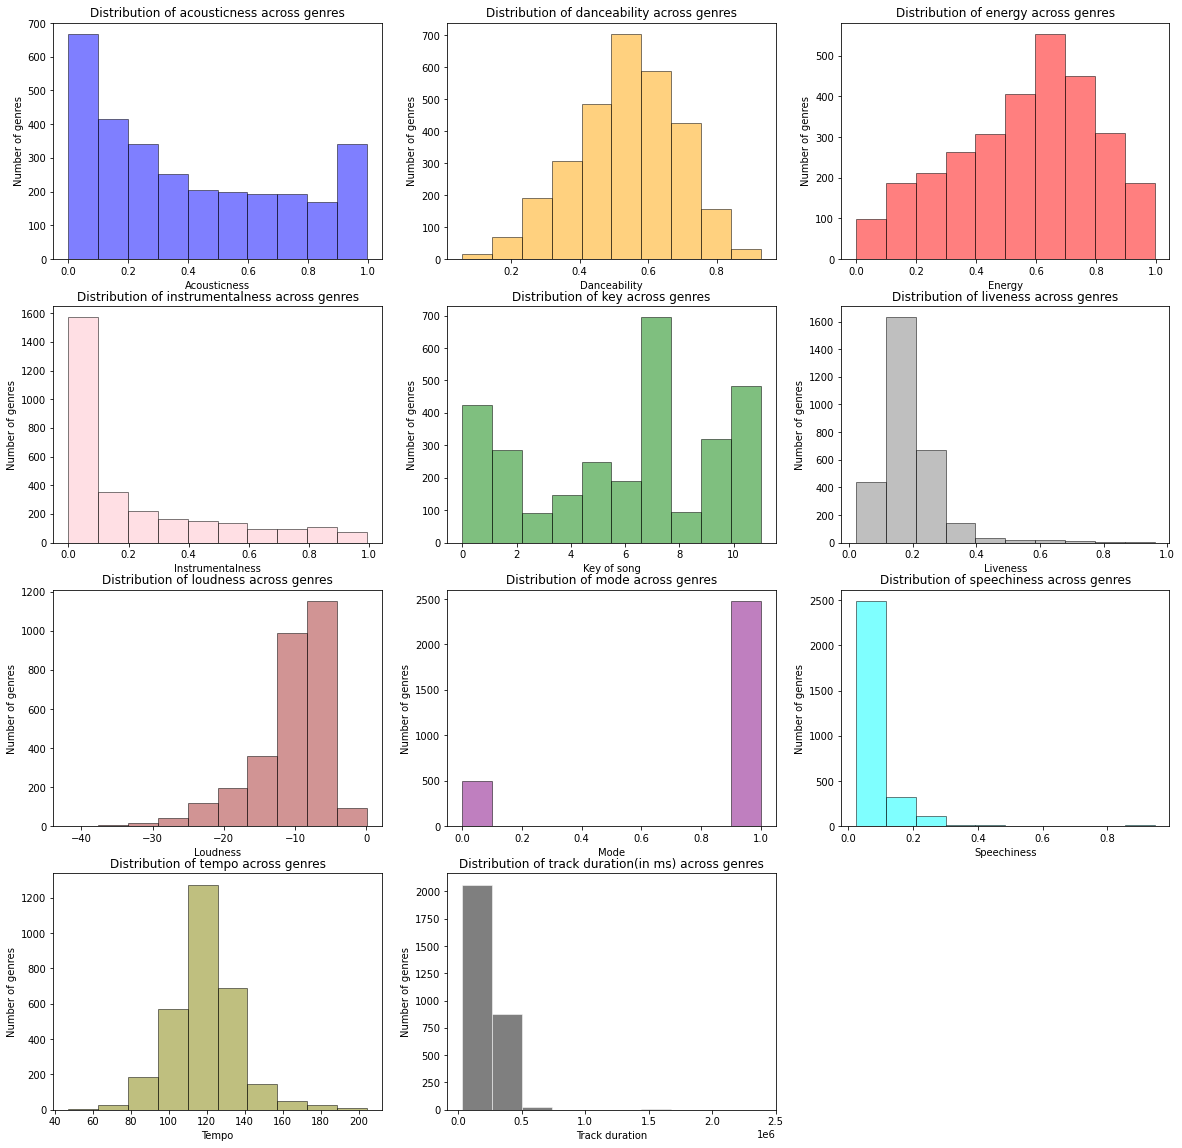

In [ ]:
''' Charecteristics of genres '''

acousticness = genre_data.groupby('genres', as_index=False)['acousticness'].mean()
danceability = genre_data.groupby('genres', as_index=False)['danceability'].mean()
energy = genre_data.groupby('genres', as_index=False)['energy'].mean()
instrumentalness = genre_data.groupby('genres', as_index=False)['instrumentalness'].mean()
key = genre_data.groupby('genres', as_index=False)['key'].mean()
liveness = genre_data.groupby('genres', as_index=False)['liveness'].mean()
loudness = genre_data.groupby('genres', as_index=False)['loudness'].mean()
mode = genre_data.groupby('genres', as_index=False)['mode'].mean()
speechiness = genre_data.groupby('genres', as_index=False)['speechiness'].mean()
tempo = genre_data.groupby('genres', as_index=False)['tempo'].mean()
duration_ms =genre_data.groupby('genres', as_index=False)['duration_ms'].mean()

fig = plt.figure(figsize = (20, 20))

plt.subplot(4, 3, 1)
plt.title('Distribution of acousticness across genres')
plt.xlabel('Acousticness')
plt.ylabel('Number of genres')
plt.hist(acousticness['acousticness'], alpha=0.5, label='acousticness', edgecolor = 'black', color = 'blue')

plt.subplot(4, 3, 2)
plt.title('Distribution of danceability across genres')
plt.xlabel('Danceability')
plt.ylabel('Number of genres')
plt.hist(danceability['danceability'], alpha=0.5, label='danceability', edgecolor = 'black', color = 'orange')

plt.subplot(4, 3, 3)
plt.title('Distribution of energy across genres')
plt.xlabel('Energy')
plt.ylabel('Number of genres')
plt.hist(energy['energy'], alpha=0.5, label='energy', edgecolor = 'black', color = 'red')

plt.subplot(4, 3, 4)
plt.title('Distribution of instrumentalness across genres')
plt.xlabel('Instrumentalness')
plt.ylabel('Number of genres')
plt.hist(instrumentalness['instrumentalness'], alpha=0.5, label='instrumentalness', edgecolor = 'black', color = 'pink')

plt.subplot(4, 3, 5)
plt.title('Distribution of key across genres')
plt.xlabel('Key of song')
plt.ylabel('Number of genres')
plt.hist(key['key'], alpha=0.5, label='key', edgecolor = 'black', color = 'green')

plt.subplot(4, 3, 6)
plt.title('Distribution of liveness across genres')
plt.xlabel('Liveness')
plt.ylabel('Number of genres')
plt.hist(liveness['liveness'], alpha=0.5, label='liveness', edgecolor = 'black', color = 'gray')

plt.subplot(4, 3, 7)
plt.title('Distribution of loudness across genres')
plt.xlabel('Loudness')
plt.ylabel('Number of genres')
plt.hist(loudness['loudness'], alpha=0.5, label='loudness', edgecolor = 'black', color = 'brown')

plt.subplot(4, 3, 8)
plt.title('Distribution of mode across genres')
plt.xlabel('Mode')
plt.ylabel('Number of genres')
plt.hist(mode['mode'], alpha=0.5, label='mode', edgecolor = 'black', color = 'purple')

plt.subplot(4, 3, 9)
plt.title('Distribution of speechiness across genres')
plt.xlabel('Speechiness')
plt.ylabel('Number of genres')
plt.hist(speechiness['speechiness'], alpha=0.5, label='speechiness', edgecolor = 'black', color = 'cyan')

plt.subplot(4, 3, 10)
plt.title('Distribution of tempo across genres')
plt.xlabel('Tempo')
plt.ylabel('Number of genres')
plt.hist(tempo['tempo'], alpha=0.5, label='tempo', edgecolor = 'black', color = 'olive')

plt.subplot(4, 3, 11)
plt.title('Distribution of track duration(in ms) across genres')
plt.xlabel('Track duration')
plt.ylabel('Number of genres')
plt.hist(duration_ms['duration_ms'], alpha=0.5, label='duration_ms', edgecolor = 'white', color = 'black')

#plt.show()

plt.savefig('drive/MyDrive/USML/v2/plots/EDA/genre_characteristics.png')

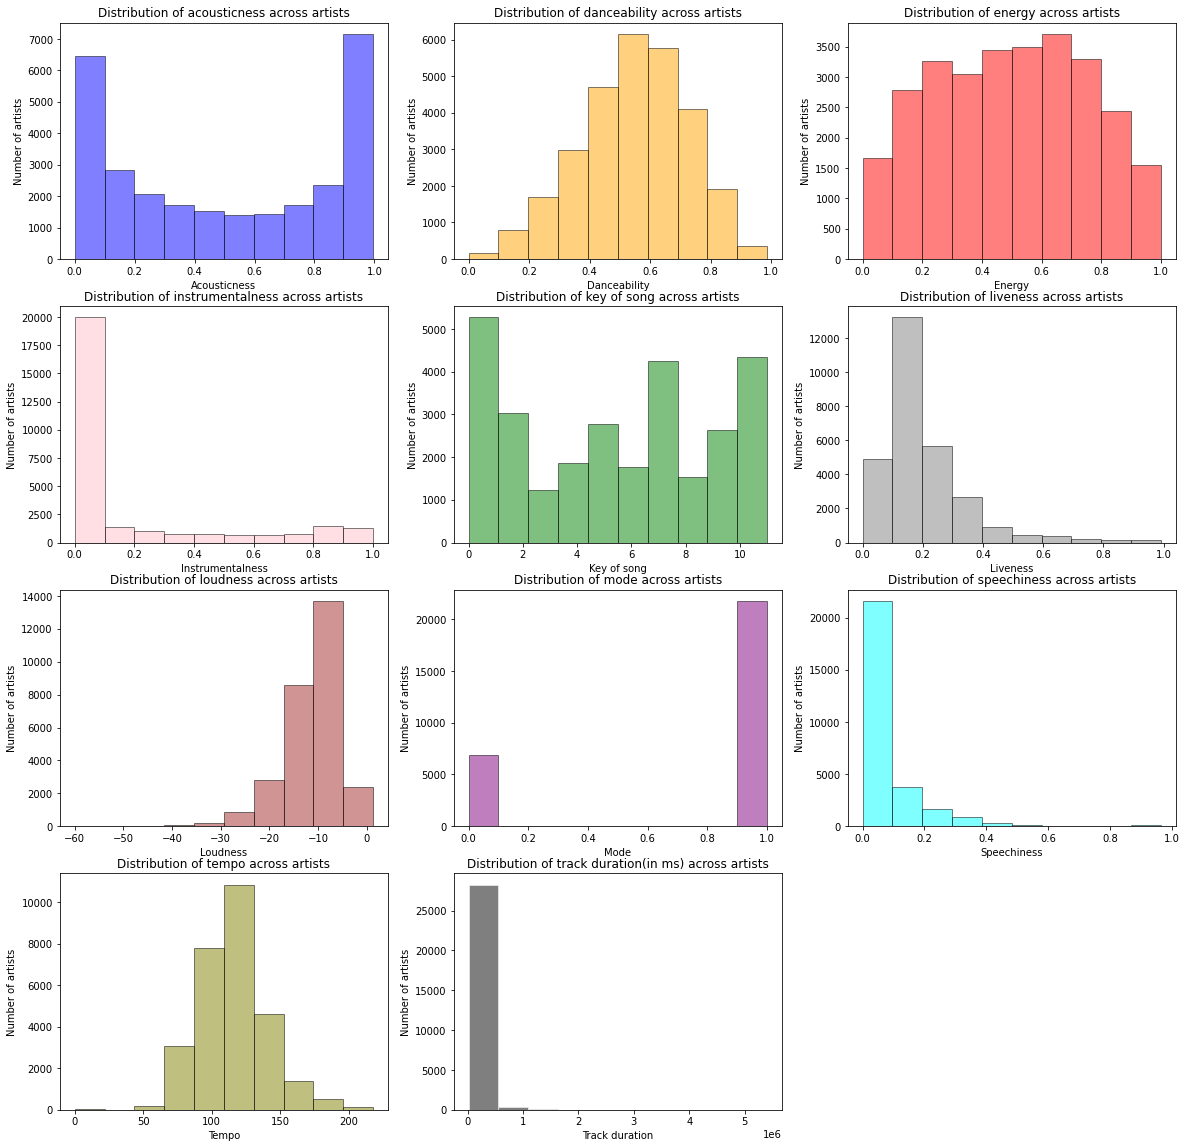

In [ ]:
''' Charecteristics of artists '''

acousticness = artist_data.groupby('artists', as_index=False)['acousticness'].mean()
danceability = artist_data.groupby('artists', as_index=False)['danceability'].mean()
energy = artist_data.groupby('artists', as_index=False)['energy'].mean()
instrumentalness = artist_data.groupby('artists', as_index=False)['instrumentalness'].mean()
key = artist_data.groupby('artists', as_index=False)['key'].mean()
liveness = artist_data.groupby('artists', as_index=False)['liveness'].mean()
loudness = artist_data.groupby('artists', as_index=False)['loudness'].mean()
mode = artist_data.groupby('artists', as_index=False)['mode'].mean()
speechiness = artist_data.groupby('artists', as_index=False)['speechiness'].mean()
tempo = artist_data.groupby('artists', as_index=False)['tempo'].mean()
duration_ms =artist_data.groupby('artists', as_index=False)['duration_ms'].mean()

fig = plt.figure(figsize = (20, 20))

plt.subplot(4, 3, 1)
plt.title('Distribution of acousticness across artists')
plt.xlabel('Acousticness')
plt.ylabel('Number of artists')
plt.hist(acousticness['acousticness'], alpha=0.5, label='acousticness', edgecolor = 'black', color = 'blue')

plt.subplot(4, 3, 2)
plt.title('Distribution of danceability across artists')
plt.xlabel('Danceability')
plt.ylabel('Number of artists')
plt.hist(danceability['danceability'], alpha=0.5, label='danceability', edgecolor = 'black', color = 'orange')

plt.subplot(4, 3, 3)
plt.title('Distribution of energy across artists')
plt.xlabel('Energy')
plt.ylabel('Number of artists')
plt.hist(energy['energy'], alpha=0.5, label='energy', edgecolor = 'black', color = 'red')

plt.subplot(4, 3, 4)
plt.title('Distribution of instrumentalness across artists')
plt.xlabel('Instrumentalness')
plt.ylabel('Number of artists')
plt.hist(instrumentalness['instrumentalness'], alpha=0.5, label='instrumentalness', edgecolor = 'black', color = 'pink')

plt.subplot(4, 3, 5)
plt.title('Distribution of key of song across artists')
plt.xlabel('Key of song')
plt.ylabel('Number of artists')
plt.hist(key['key'], alpha=0.5, label='key', edgecolor = 'black', color = 'green')

plt.subplot(4, 3, 6)
plt.title('Distribution of liveness across artists')
plt.xlabel('Liveness')
plt.ylabel('Number of artists')
plt.hist(liveness['liveness'], alpha=0.5, label='liveness', edgecolor = 'black', color = 'gray')

plt.subplot(4, 3, 7)
plt.title('Distribution of loudness across artists')
plt.xlabel('Loudness')
plt.ylabel('Number of artists')
plt.hist(loudness['loudness'], alpha=0.5, label='loudness', edgecolor = 'black', color = 'brown')

plt.subplot(4, 3, 8)
plt.title('Distribution of mode across artists')
plt.xlabel('Mode')
plt.ylabel('Number of artists')
plt.hist(mode['mode'], alpha=0.5, label='mode', edgecolor = 'black', color = 'purple')

plt.subplot(4, 3, 9)
plt.title('Distribution of speechiness across artists')
plt.xlabel('Speechiness')
plt.ylabel('Number of artists')
plt.hist(speechiness['speechiness'], alpha=0.5, label='speechiness', edgecolor = 'black', color = 'cyan')

plt.subplot(4, 3, 10)
plt.title('Distribution of tempo across artists')
plt.xlabel('Tempo')
plt.ylabel('Number of artists')
plt.hist(tempo['tempo'], alpha=0.5, label='tempo', edgecolor = 'black', color = 'olive')

plt.subplot(4, 3, 11)
plt.title('Distribution of track duration(in ms) across artists')
plt.xlabel('Track duration')
plt.ylabel('Number of artists')
plt.hist(duration_ms['duration_ms'], alpha=0.5, label='duration_ms', edgecolor = 'white', color = 'black')

#plt.show()

plt.savefig('drive/MyDrive/USML/v2/plots/EDA/artist_characteristics.png')

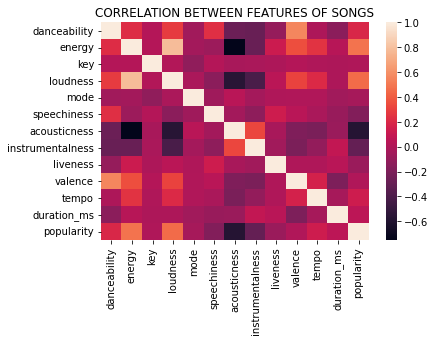

In [ ]:
''' CORRELATION BETWEEN FEATURES OF SONGS '''

data_sample = data[['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'popularity']]

sns.heatmap(data_sample.corr())
plt.title('CORRELATION BETWEEN FEATURES OF SONGS')
#plt.show()

plt.savefig('drive/MyDrive/USML/v2/plots/EDA/correlation_plot.png')

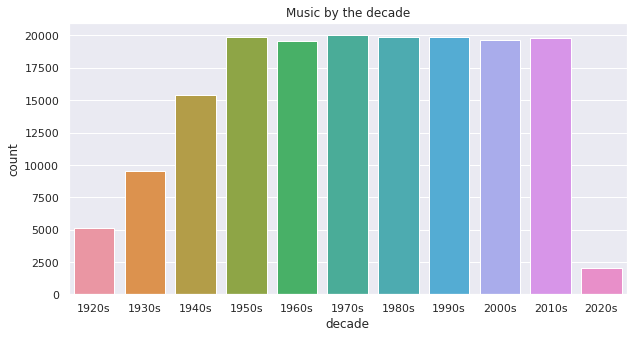

In [ ]:
''' Music by the decade '''

data_decade = data.copy()
decade = []

for index, row in data.iterrows():
  start = str(int(row['year']/10) * 10) + 's'
  decade.append(start)
data_decade['decade'] = decade

sns.set(rc={'figure.figsize':(10 ,5)})
plt.title('Music by the decade')
plt.xlabel('Decade')
plt.ylabel('Number of songs')
sns.countplot(data_decade['decade'])
#plt.show()

plt.savefig('drive/MyDrive/USML/v2/plots/EDA/music_by_the_decade.png')

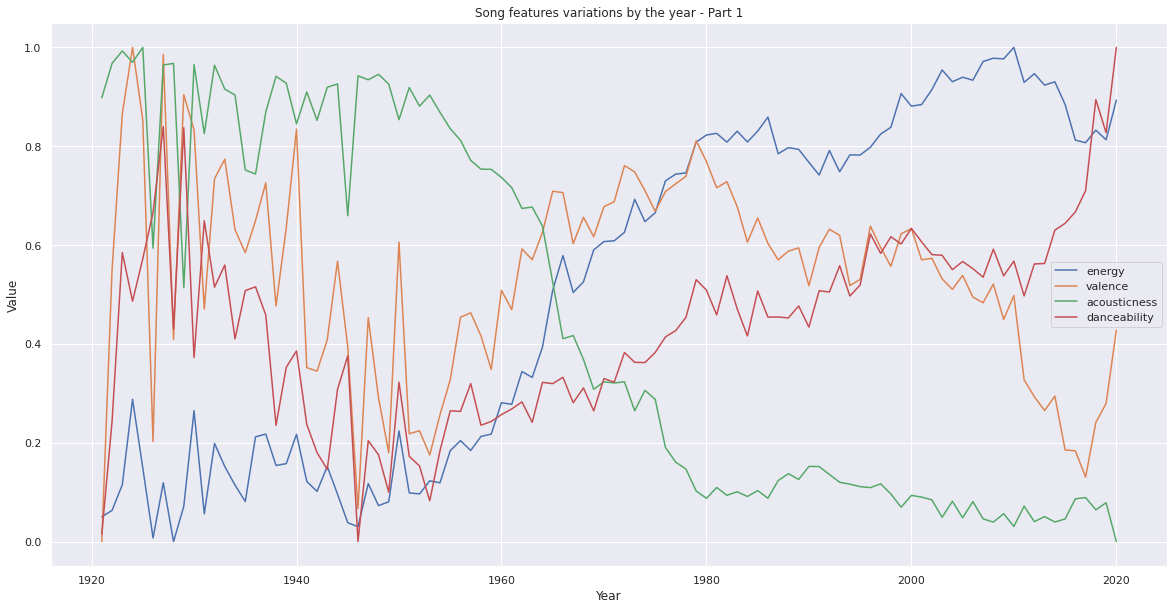

In [ ]:
''' Song feature variatons by the year '''

year_data_norm = year_data.drop(['year', 'mode', 'key'], axis=1)
year_data_norm = (year_data_norm - year_data_norm.min())/(year_data_norm.max() - year_data_norm.min())
year_data_norm = pd.concat((year_data_norm, year_data.year), 1)

fig = plt.figure(figsize = (20, 10))

plt.plot(year_data_norm['year'], year_data_norm['energy'], label = 'energy')
plt.plot(year_data_norm['year'], year_data_norm['valence'], label = 'valence')
plt.plot(year_data_norm['year'], year_data_norm['acousticness'], label = 'acousticness')
plt.plot(year_data_norm['year'], year_data_norm['danceability'], label = 'danceability')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Song features variations by the year - Part 1')
plt.legend()
plt.grid(True)
#plt.show()

plt.savefig('drive/MyDrive/USML/v2/plots/EDA/song_variations_year_1.png')

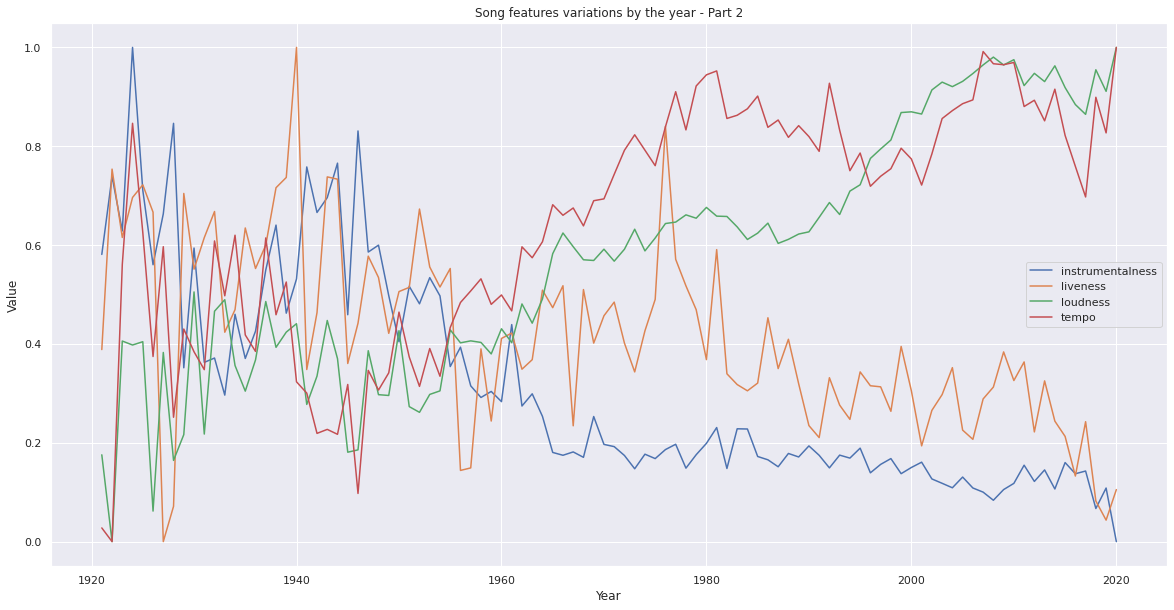

In [ ]:
''' Song feature variatons by the year '''

year_data_norm = year_data.drop(['year', 'mode', 'key'], axis=1)
year_data_norm = (year_data_norm - year_data_norm.min())/(year_data_norm.max() - year_data_norm.min())
year_data_norm = pd.concat((year_data_norm, year_data.year), 1)

fig = plt.figure(figsize = (20, 10))

plt.plot(year_data_norm['year'], year_data_norm['instrumentalness'], label = 'instrumentalness')
plt.plot(year_data_norm['year'], year_data_norm['liveness'], label = 'liveness')
plt.plot(year_data_norm['year'], year_data_norm['loudness'], label = 'loudness')
plt.plot(year_data_norm['year'], year_data_norm['tempo'], label = 'tempo')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Song features variations by the year - Part 2')
plt.legend()
plt.grid(True)
#plt.show()

plt.savefig('drive/MyDrive/USML/v2/plots/EDA/song_variations_year_2.png')

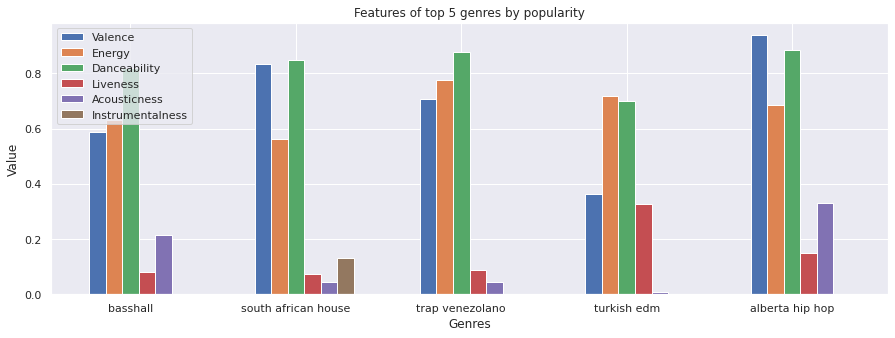

In [ ]:
''' Features of top 5 genres '''

top_genres = genre_data.nlargest(5, 'popularity')

X = top_genres['genres']
valence = top_genres['valence']
energy = top_genres['energy']
danceability = top_genres['danceability']
liveness = top_genres['liveness']
acousticness = top_genres['acousticness']
instrumentalness = top_genres['instrumentalness']

fig = plt.figure(figsize = (15, 5))
  
X_axis = np.arange(len(X))  
plt.bar(X_axis - 0.2, valence, 0.1, label = 'Valence')
plt.bar(X_axis - 0.1, energy, 0.1, label = 'Energy')
plt.bar(X_axis - 0, danceability, 0.1, label = 'Danceability')
plt.bar(X_axis + 0.1, liveness, 0.1, label = 'Liveness')
plt.bar(X_axis + 0.2, acousticness, 0.1, label = 'Acousticness')
plt.bar(X_axis + 0.3, instrumentalness, 0.1, label = 'Instrumentalness')
  
plt.xticks(X_axis, X)
plt.xlabel('Genres')
plt.ylabel('Value')
plt.title('Features of top 5 genres by popularity')
plt.legend()
plt.grid(True)
#plt.show()

plt.savefig('drive/MyDrive/USML/v2/plots/EDA/top_genres.png')

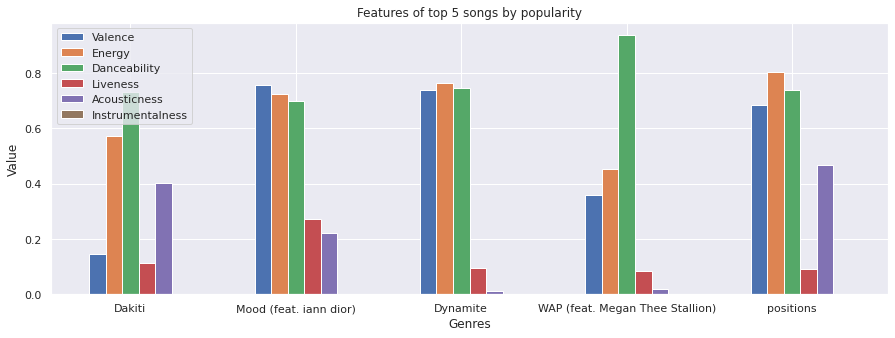

In [ ]:
''' Features of top 5 songs '''

top_songs = data.nlargest(5, 'popularity')

X = top_songs['name']
valence = top_songs['valence']
energy = top_songs['energy']
danceability = top_songs['danceability']
liveness = top_songs['liveness']
acousticness = top_songs['acousticness']
instrumentalness = top_songs['instrumentalness']

fig = plt.figure(figsize = (15, 5))
  
X_axis = np.arange(len(X))  
plt.bar(X_axis - 0.2, valence, 0.1, label = 'Valence')
plt.bar(X_axis - 0.1, energy, 0.1, label = 'Energy')
plt.bar(X_axis - 0, danceability, 0.1, label = 'Danceability')
plt.bar(X_axis + 0.1, liveness, 0.1, label = 'Liveness')
plt.bar(X_axis + 0.2, acousticness, 0.1, label = 'Acousticness')
plt.bar(X_axis + 0.3, instrumentalness, 0.1, label = 'Instrumentalness')
  
plt.xticks(X_axis, X)
plt.xlabel('Genres')
plt.ylabel('Value')
plt.title('Features of top 5 songs by popularity')
plt.legend()
plt.grid(True)
#plt.show()

plt.savefig('drive/MyDrive/USML/v2/plots/EDA/top_songs.png')

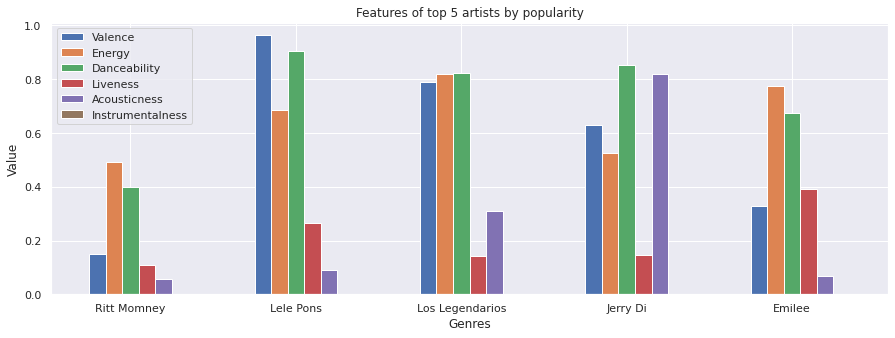

In [ ]:
''' Features of top 5 artists '''

top_artists = artist_data.nlargest(5, 'popularity')

X = top_artists['artists']
valence = top_artists['valence']
energy = top_artists['energy']
danceability = top_artists['danceability']
liveness = top_artists['liveness']
acousticness = top_artists['acousticness']
instrumentalness = top_artists['instrumentalness']

fig = plt.figure(figsize = (15, 5))
  
X_axis = np.arange(len(X))  
plt.bar(X_axis - 0.2, valence, 0.1, label = 'Valence')
plt.bar(X_axis - 0.1, energy, 0.1, label = 'Energy')
plt.bar(X_axis - 0, danceability, 0.1, label = 'Danceability')
plt.bar(X_axis + 0.1, liveness, 0.1, label = 'Liveness')
plt.bar(X_axis + 0.2, acousticness, 0.1, label = 'Acousticness')
plt.bar(X_axis + 0.3, instrumentalness, 0.1, label = 'Instrumentalness')
  
plt.xticks(X_axis, X)
plt.xlabel('Genres')
plt.ylabel('Value')
plt.title('Features of top 5 artists by popularity')
plt.legend()
plt.grid(True)
#plt.show()

plt.savefig('drive/MyDrive/USML/v2/plots/EDA/top_artists.png')

In [ ]:
''' Top 10 songs '''

top_songs = data.nlargest(10, 'popularity')
top_songs[['name', 'popularity']]
top_songs.to_csv('drive/MyDrive/USML/v2/top_songs.csv')

In [ ]:
''' Top 10 artists '''

top_artists = artist_data.nlargest(10, 'popularity')
top_artists[['artists', 'popularity']]
top_artists.to_csv('drive/MyDrive/USML/v2/top_artists.csv')

In [ ]:
''' Top 10 genres '''

top_genres = genre_data.nlargest(10, 'popularity')
top_genres[['genres', 'popularity']]
top_genres.to_csv('drive/MyDrive/USML/v2/top_genres.csv')